In [1]:
#Celda para librerías


import sklearn as sk

import matplotlib as plt
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

print(np.__version__)
from ydata_profiling import ProfileReport
import os
print("Directorio actual:", os.getcwd())



# Have all columns appear when dataframes are displayed.
pd.set_option('display.max_columns', None) 
# Have 100 rows appear when a dataframe is displayed
pd.set_option('display.max_rows', 500)
# Display dimensions whenever a dataframe is printed out.
pd.set_option('display.show_dimensions', True)

bureau = pd.read_csv(r'C:/Users/Yeray/Desktop/DATA_SCIENCE_ML/Home-Credit-TFG/DATA/home-credit-default-risk/bureau.csv')

1.23.5
Directorio actual: c:\Users\Yeray\Desktop\DATA_SCIENCE_ML\Home-Credit-TFG\JUPYTER_NOTEBOOKS


In [2]:
print(bureau.shape)
#print(bureau.head(10))
print(bureau.describe().transpose())
print(bureau.info())


(1716428, 17)
                            count          mean           std          min  \
SK_ID_CURR              1716428.0  2.782149e+05  1.029386e+05   100001.000   
SK_ID_BUREAU            1716428.0  5.924434e+06  5.322657e+05  5000000.000   
DAYS_CREDIT             1716428.0 -1.142108e+03  7.951649e+02    -2922.000   
CREDIT_DAY_OVERDUE      1716428.0  8.181666e-01  3.654443e+01        0.000   
DAYS_CREDIT_ENDDATE     1610875.0  5.105174e+02  4.994220e+03   -42060.000   
DAYS_ENDDATE_FACT       1082775.0 -1.017437e+03  7.140106e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   591940.0  3.825418e+03  2.060316e+05        0.000   
CNT_CREDIT_PROLONG      1716428.0  6.410406e-03  9.622391e-02        0.000   
AMT_CREDIT_SUM          1716415.0  3.549946e+05  1.149811e+06        0.000   
AMT_CREDIT_SUM_DEBT     1458759.0  1.370851e+05  6.774011e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT    1124648.0  6.229515e+03  4.503203e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  1716428.0  3.791276e+01  5

In [6]:
#Vamos a generar un reporte para ver los datos de manera más visual
profile = ProfileReport(bureau, title="Bureau Profiling Report")
profile.to_file("bureau_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
#Vamos a ver la cantidad de valores nulos por columna
variables_ordenadas_por_nulos = bureau.isnull().sum().sort_values(ascending=False)
print(variables_ordenadas_por_nulos)

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
SK_ID_BUREAU                    0
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
SK_ID_CURR                      0
Length: 17, dtype: int64


In [4]:
#Variables categóricas en bureau y sus valores únicos
categoricals = bureau.select_dtypes(include=['object'])
print(categoricals.columns)
for col in categoricals.columns:
    print(col)
    print(categoricals[col].unique())
display(categoricals.nunique())

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')
CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']
CREDIT_TYPE
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']


CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
Length: 3, dtype: int64

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


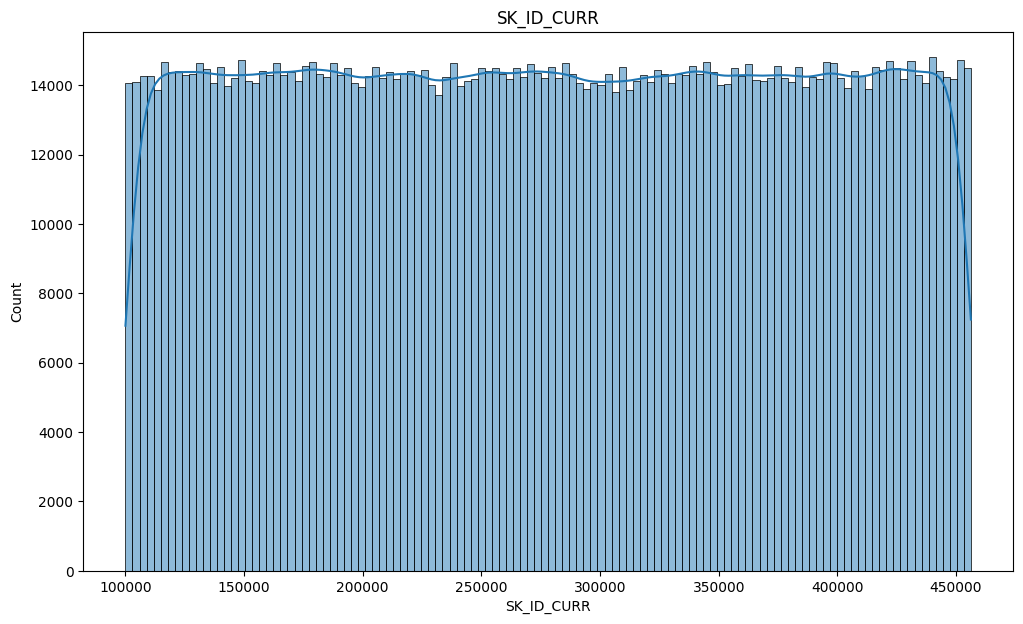

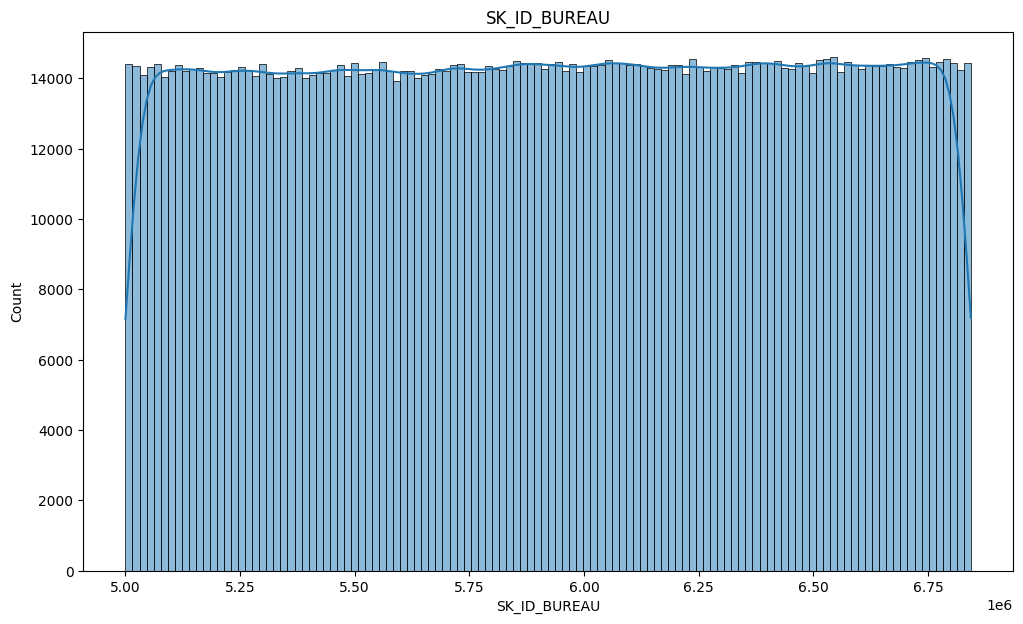

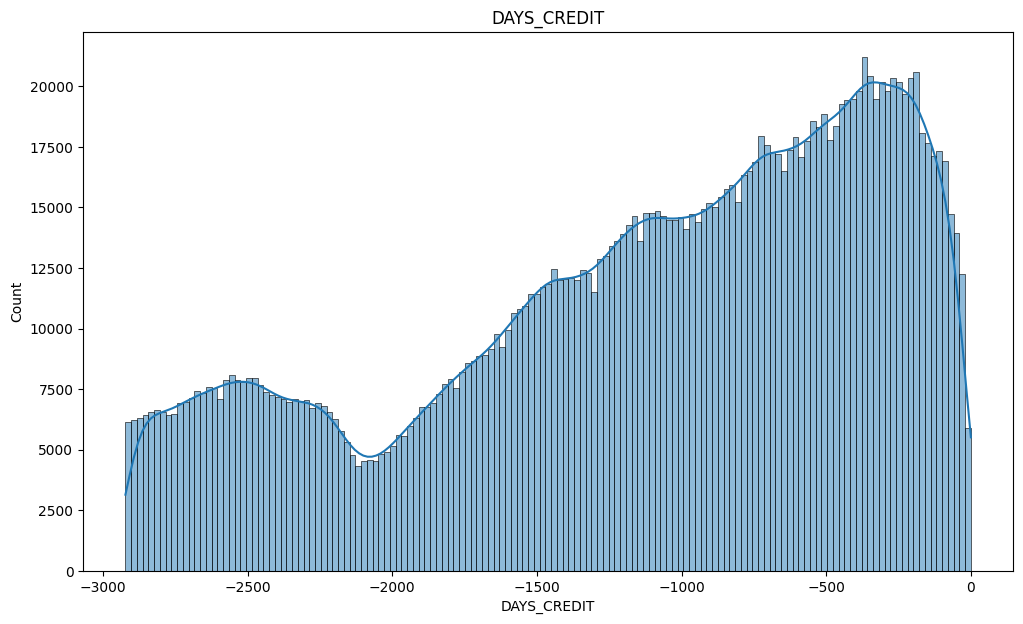

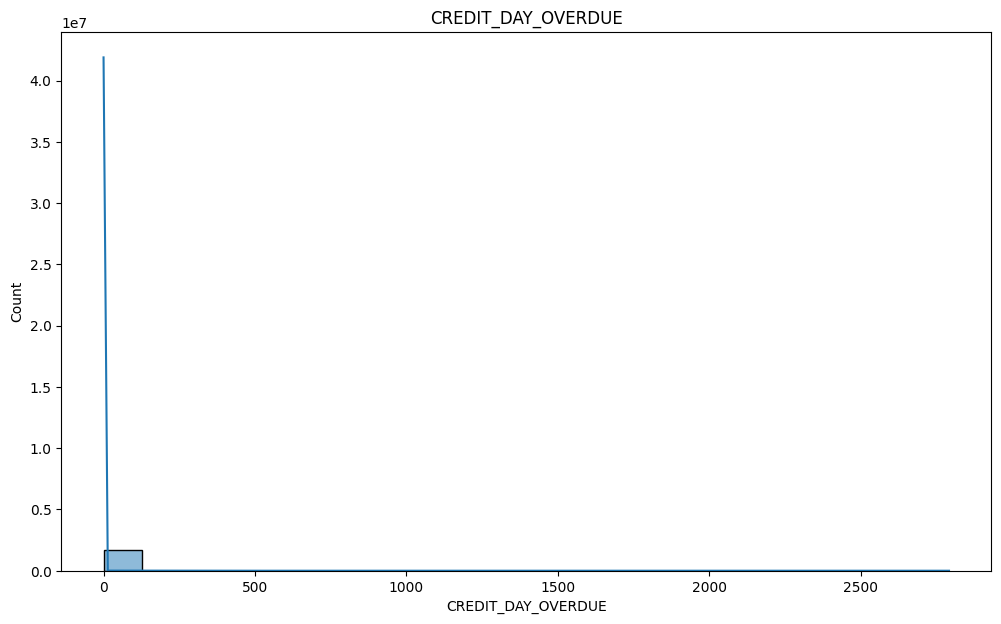

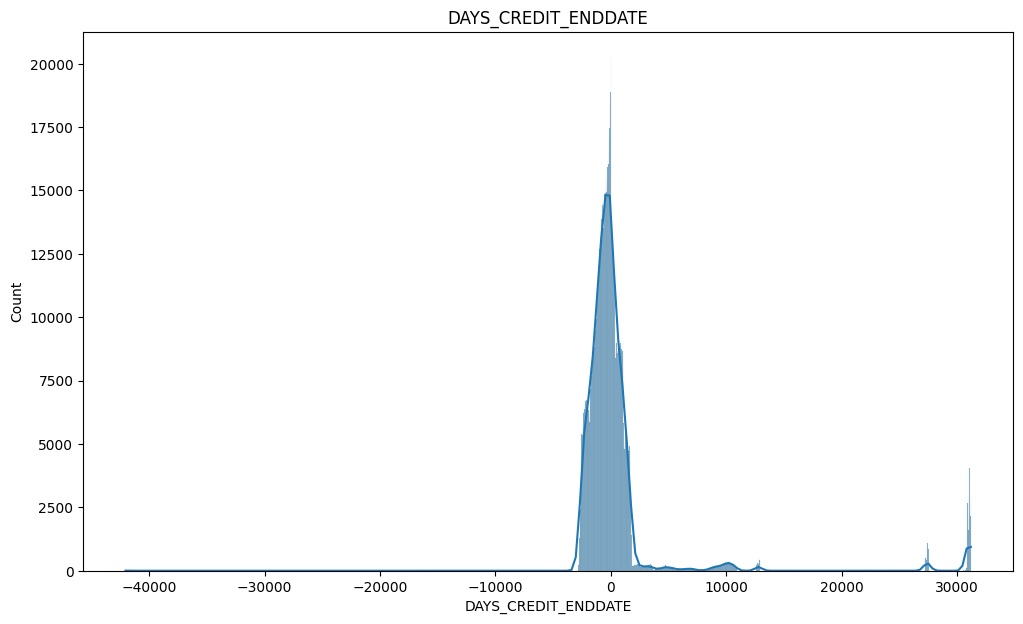

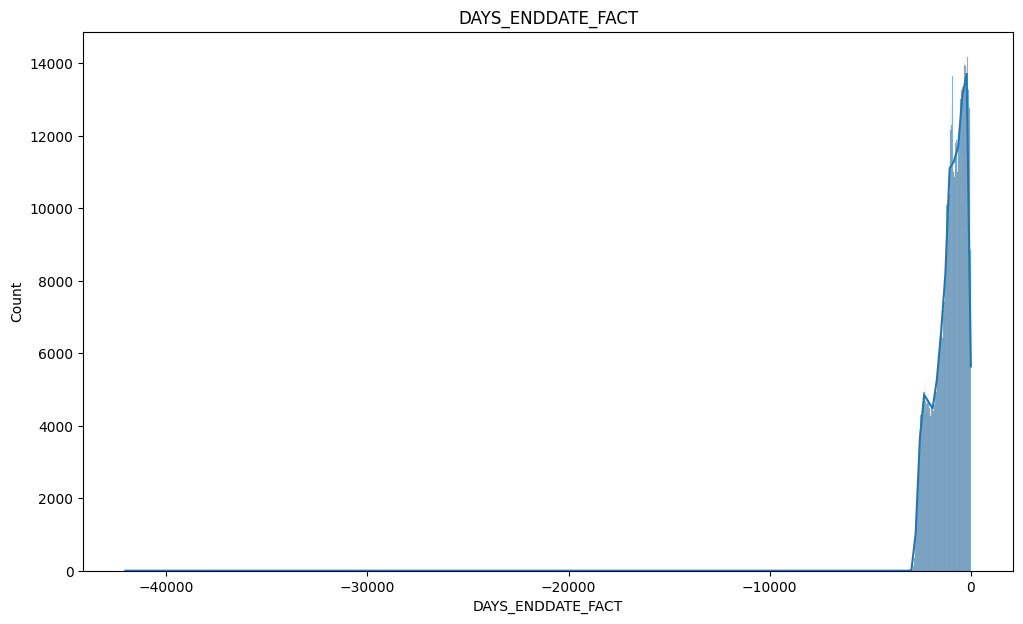

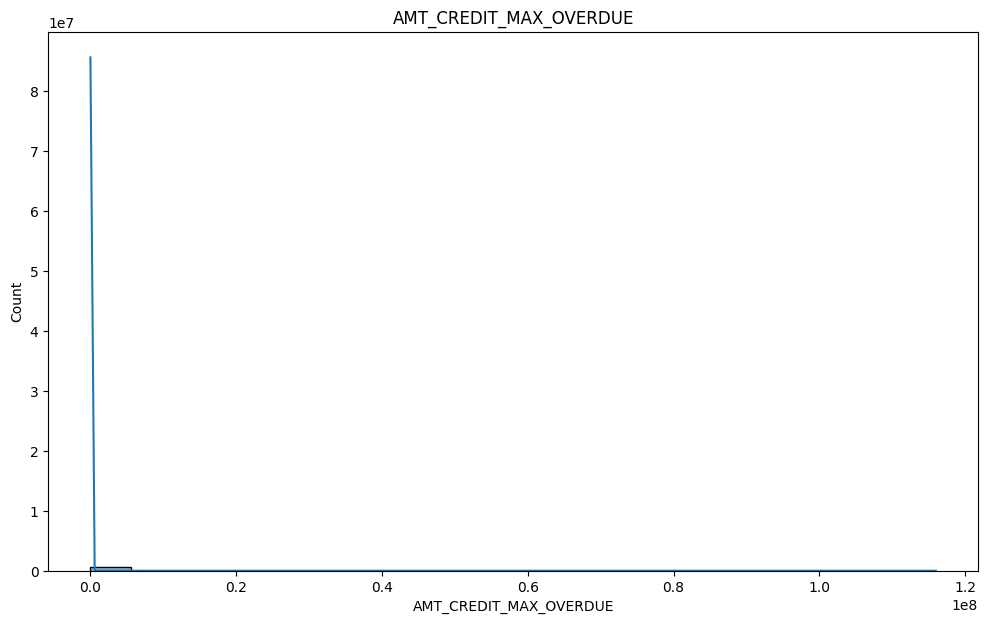

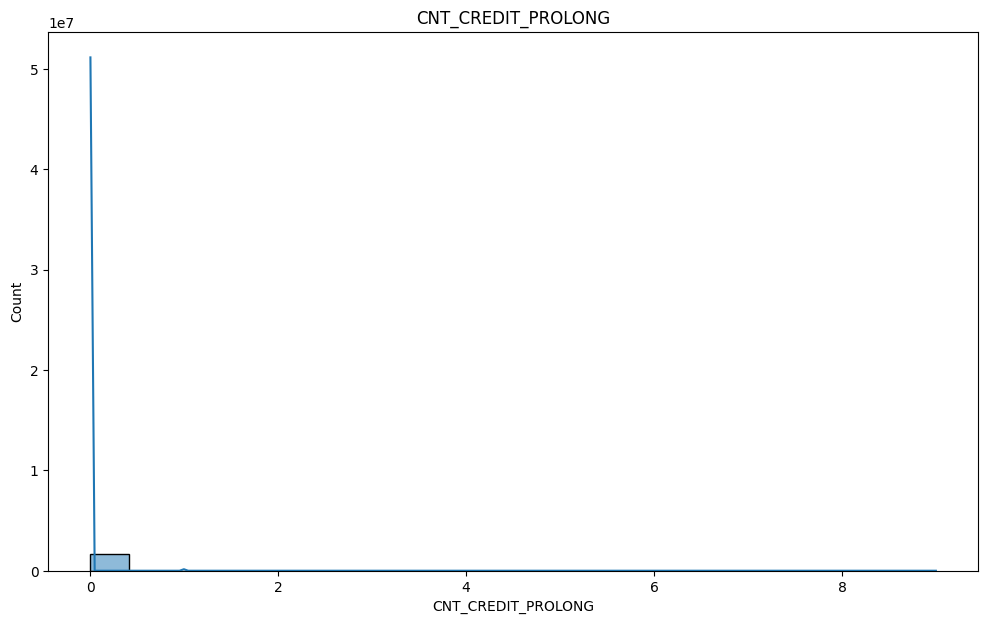

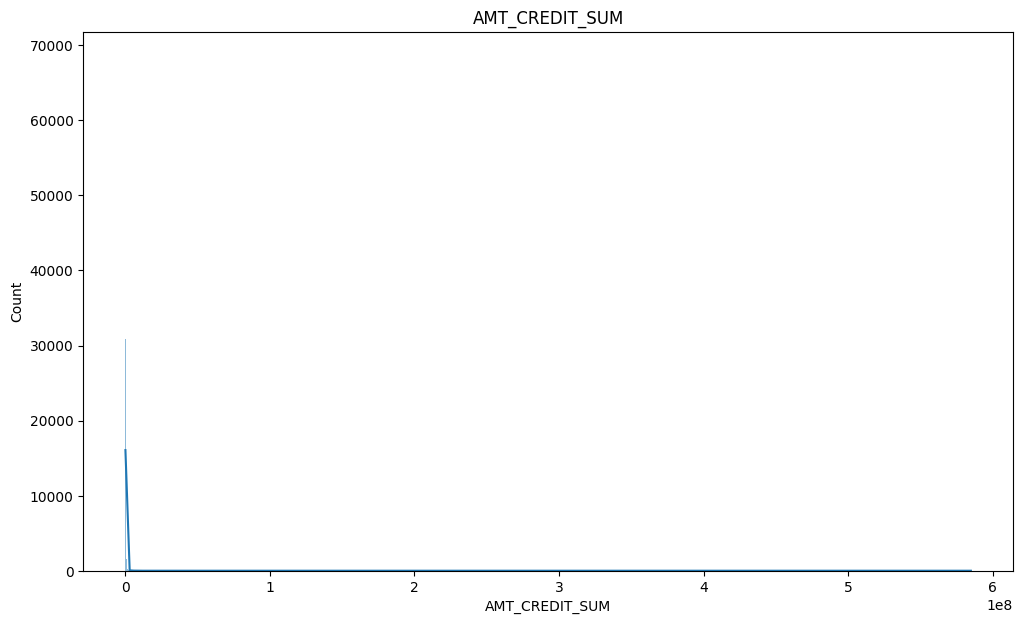

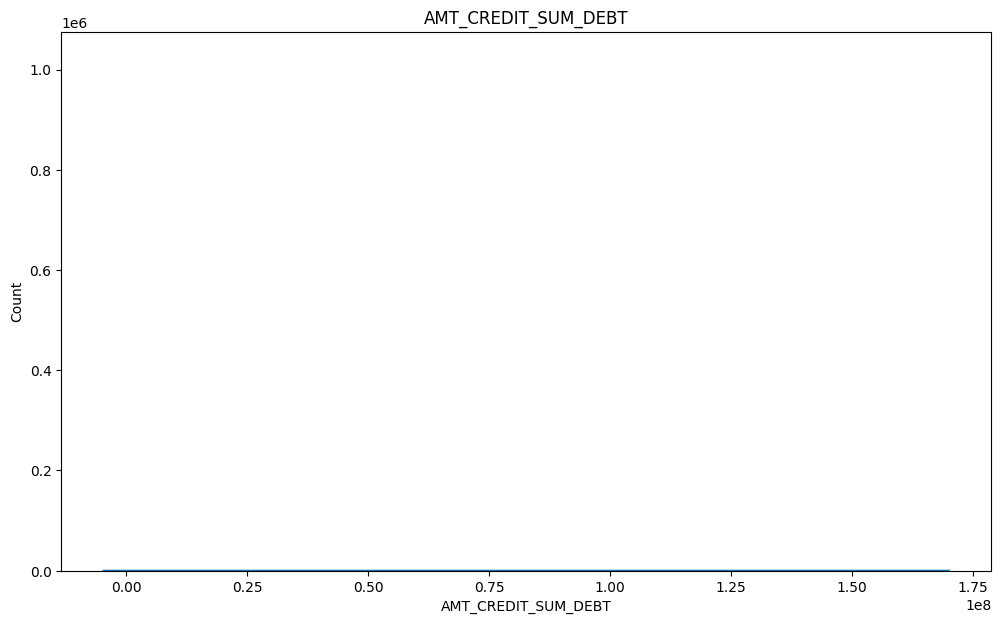

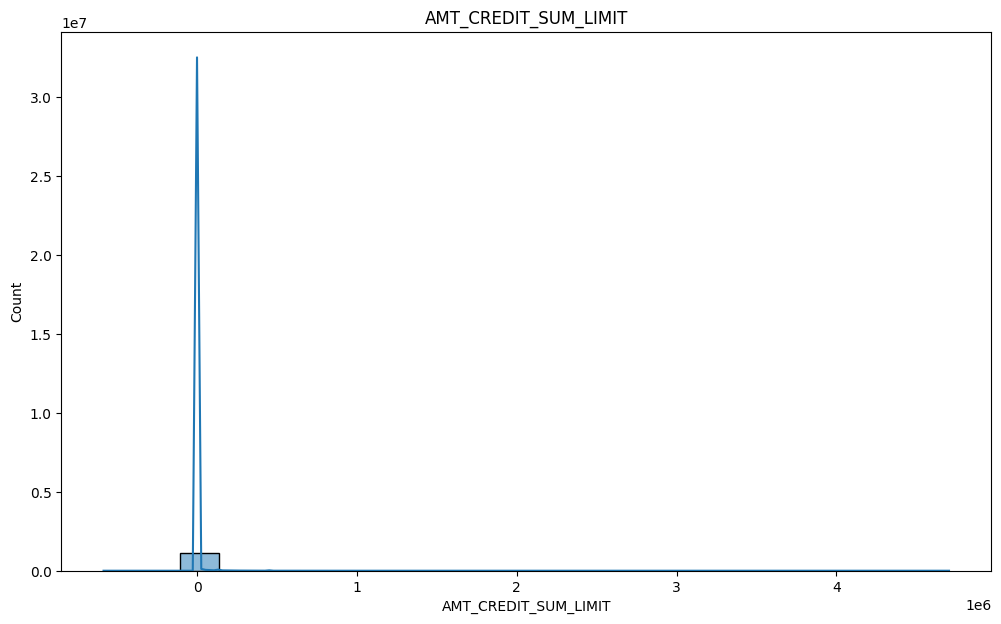

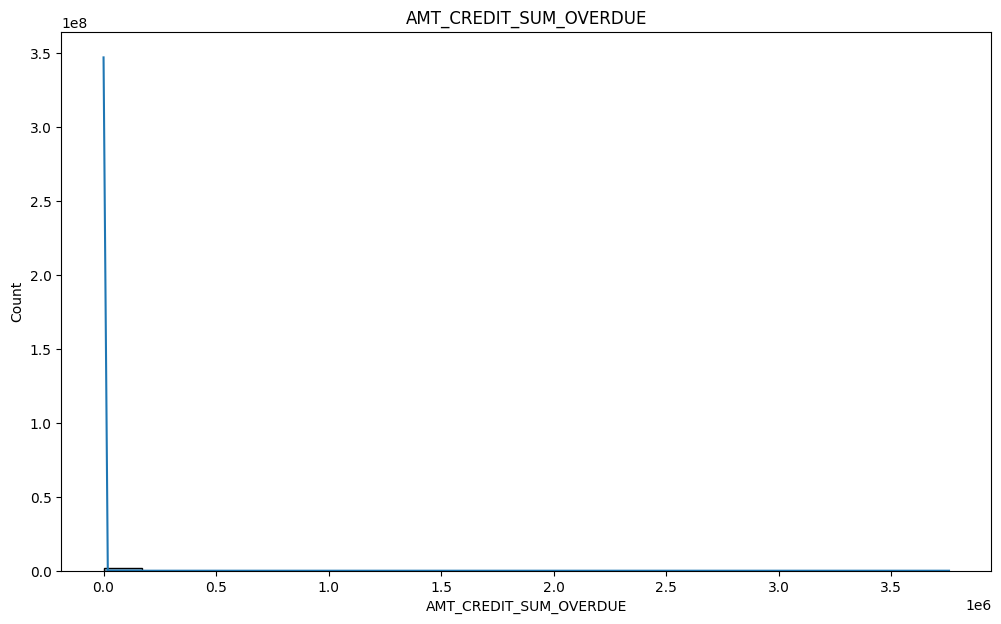

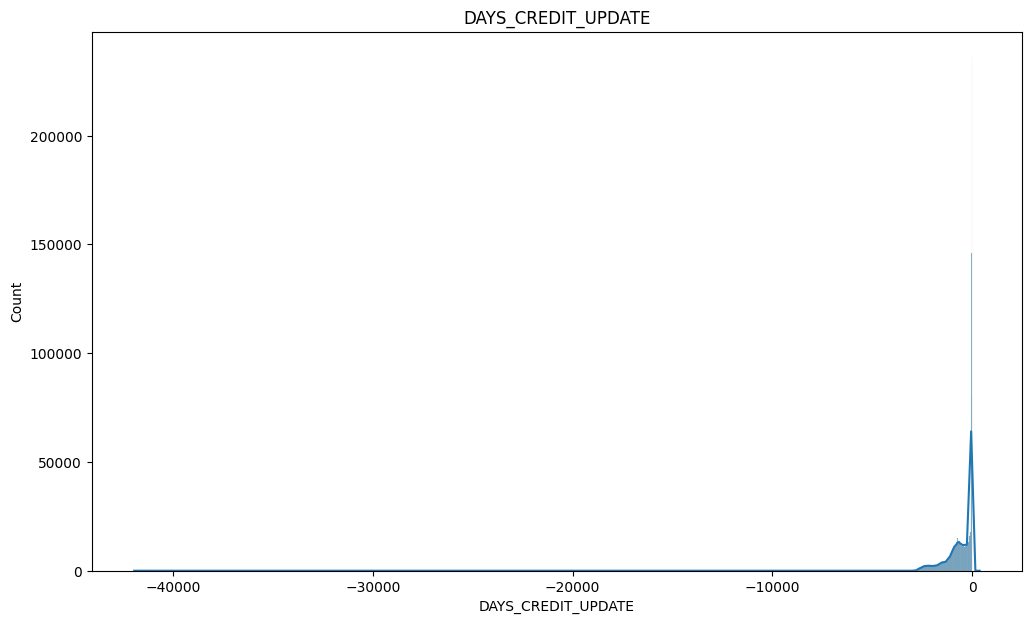

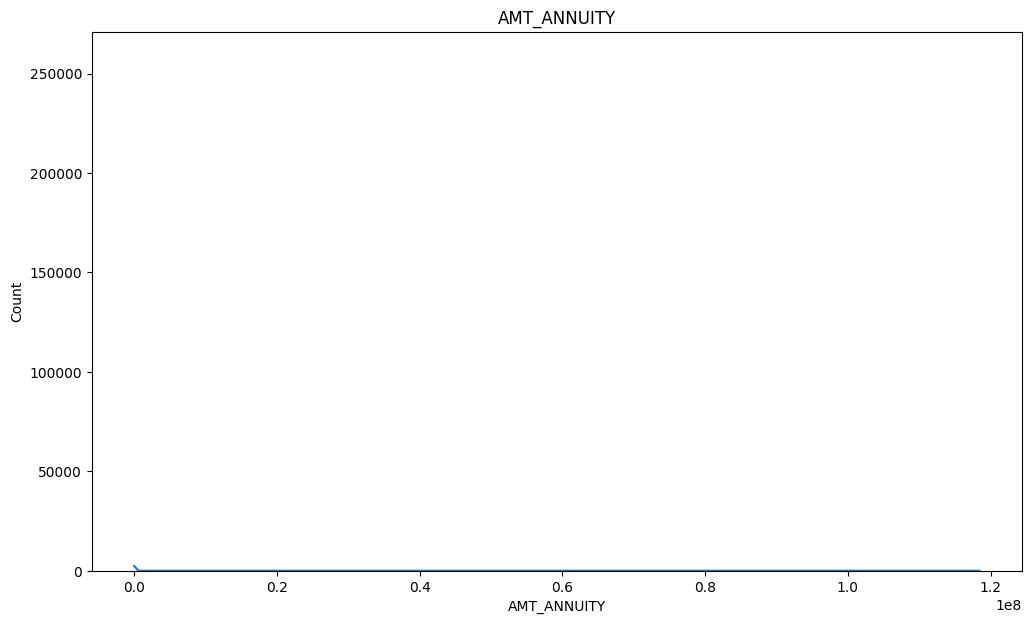

In [7]:
#Variables numéricas en bureau 
variables_numericas = bureau.select_dtypes(include=['int64', 'float64'])
print(variables_numericas.columns)

#Como son pocas variables vamos a ver su distribución de manera visual
for col in variables_numericas.columns:
    plt.figure(figsize=(12, 7))
    sns.histplot(variables_numericas[col], kde=True)
    plt.title(col)
    plt.show()